In [ ]:
!pip install yfinance

     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 6.4 MB 21.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
 #LSTM
 # past 60 day stock price
 import math
 import numpy as np
 import pandas as pd
 from pandas_datareader import data as pdr
 from sklearn.preprocessing import MinMaxScaler
 from keras.models import Sequential
 from keras.layers import Dense, LSTM
 import matplotlib.pyplot as plt
 import yfinance as yfin
 yfin.pdr_override()
 plt.style.use('fivethirtyeight')
 #note: 20 -> 0.9
 #:   25 -> 0.8

In [ ]:
stock = '2885.TW'
startDate = '2012-01-01'
endDate = '2022-03-21'

In [ ]:
# cuz this stock elavated since 2020 the previous data won't be a good training set
df = pdr.get_data_yahoo(stock, startDate, endDate)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,14.168706,14.168706,13.620240,13.620240,9.428009,29708674
2012-01-03,13.711651,14.077295,13.711651,13.985884,9.681110,46878378
2012-01-04,14.077295,14.168706,13.894473,13.985884,9.681110,53722193
2012-01-05,13.985884,13.985884,13.803062,13.940179,9.649473,57510577
2012-01-06,13.894473,13.894473,13.665946,13.848768,9.586199,25298921
...,...,...,...,...,...,...
2022-03-14,24.799999,24.950001,24.700001,24.850000,24.850000,13703934
2022-03-15,24.850000,24.850000,24.500000,24.650000,24.650000,16810987
2022-03-16,25.299999,25.700001,25.299999,25.600000,25.600000,38075176


In [ ]:
df.shape

(2494, 6)

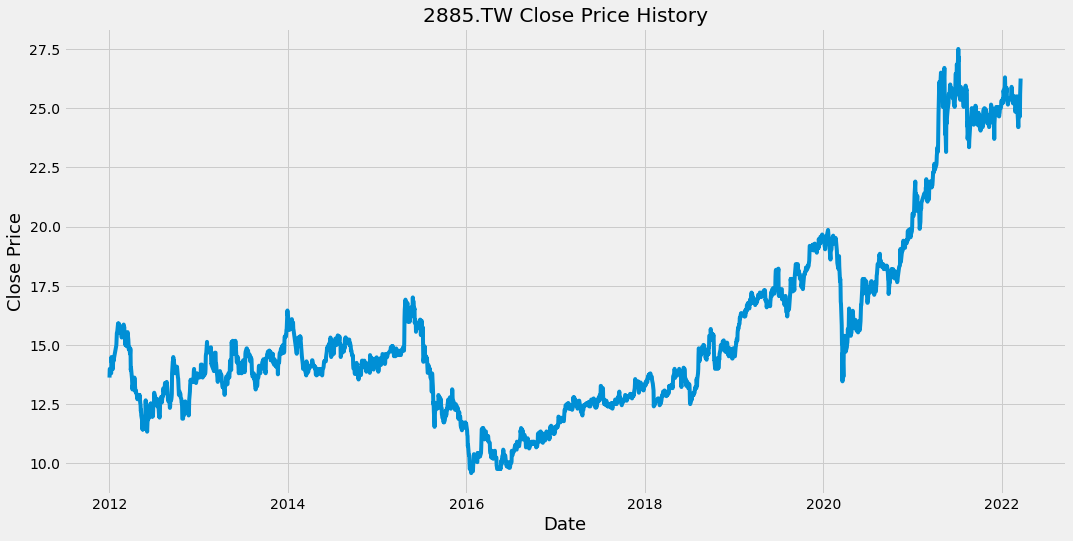

In [ ]:
#visualize the clozing price
plt.figure(figsize=(16,8))
plt.title(stock+' Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [ ]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.8) #training set length
training_data_len 

1996

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.22517713],
       [0.24558879],
       [0.24558879],
       ...,
       [0.89393454],
       [0.91626409],
       [0.93022008]])

In [ ]:
#create the training data set
#create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

#60 is the number of data machine knows when predicting
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.22517713, 0.24558879, 0.24558879, 0.24303737, 0.23793446,
       0.23538299, 0.27365488, 0.26089755, 0.26855198, 0.25834613,
       0.24558879, 0.27110341, 0.26344908, 0.30172092, 0.31702974,
       0.32978707, 0.3323385 , 0.33488997, 0.35275016, 0.3374414 ,
       0.35275016, 0.35275016, 0.34254435, 0.34764725, 0.32978707,
       0.34509583, 0.3323385 , 0.3323385 , 0.33488997, 0.31958121,
       0.3323385 , 0.32468412, 0.3323385 , 0.35019873, 0.3374414 ,
       0.34509583, 0.31958121, 0.30937536, 0.30172092, 0.32213264,
       0.31447826, 0.2991695 , 0.32213264, 0.32213264, 0.32978707,
       0.3323385 , 0.31447826, 0.30172092, 0.29151512, 0.29661802,
       0.29661802, 0.28130926, 0.2940666 , 0.2889637 , 0.24303737,
       0.24814032, 0.23028003, 0.22262571, 0.19711109, 0.20731689])]
[0.19966251457519435]

[array([0.22517713, 0.24558879, 0.24558879, 0.24303737, 0.23793446,
       0.23538299, 0.27365488, 0.26089755, 0.26855198, 0.25834613,
       0.24558879, 0.27110341, 0.26

In [ ]:
#convert the x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)


In [ ]:
#reshape to 3-dimension
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1936, 60, 1)

In [ ]:
#LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=4)

Epoch 1/4
1936/1936 [==============================] - 40s 20ms/step - loss: 6.5136e-04
Epoch 2/4
1936/1936 [==============================] - 37s 19ms/step - loss: 3.1055e-04
Epoch 3/4
1936/1936 [==============================] - 39s 20ms/step - loss: 2.2558e-04
Epoch 4/4
1936/1936 [==============================] - 38s 20ms/step - loss: 2.1100e-04


In [ ]:
#Create the testing data set
#Create a new array containing scaled values from index 1500 to 1950
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape to 3-dimension
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions.shape
predictions = scaler.inverse_transform(predictions)


In [ ]:
#Get the root mean squared error (RMSE)
#measure how good the prediction is
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.05139063639813159

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


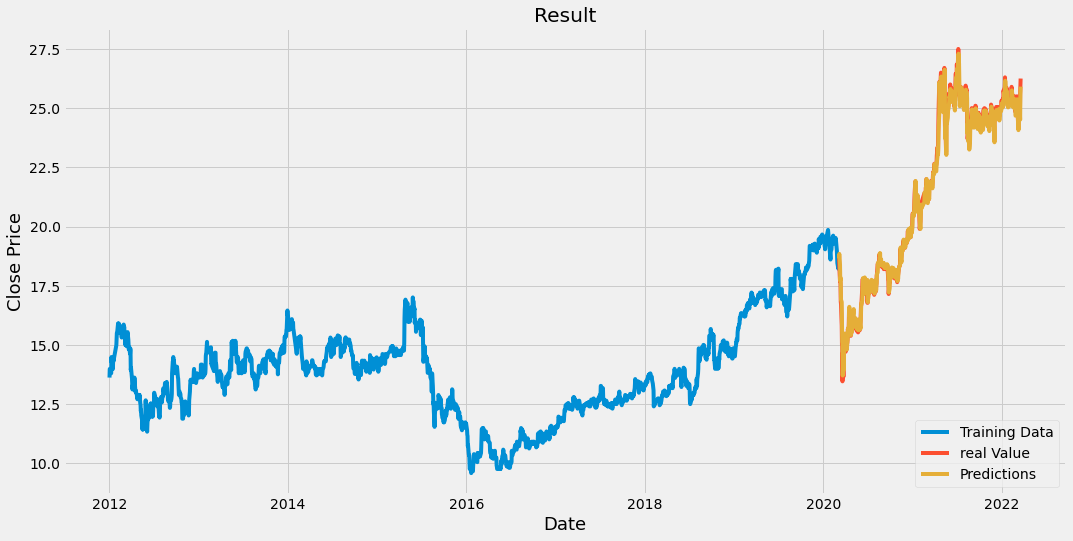

In [ ]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize
plt.figure(figsize=(16,8))
plt.title('Result')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Training Data', 'real Value', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the actual and predicted prices
valid

,Close,Predictions
Date,,
2020-03-05,18.750000,18.660315
2020-03-06,18.317307,18.844379
2020-03-09,17.692307,18.376392
2020-03-10,17.788462,17.722126
2020-03-11,17.548077,17.841183
...,...,...
2022-03-14,24.850000,24.681683
2022-03-15,24.650000,24.756922
2022-03-16,25.600000,24.512106


In [ ]:
#Get the quote
stock_quote = pdr.DataReader(stock, data_source='yahoo', start=startDate, end=endDate)
#Create a snew dataframe
new_df = stock_quote.filter(['Close'])
#get the last 60 day
last_60_days = new_df[-60:].values
#Scale the data
last_60_days_scaled = scaler.transform(last_60_days)

X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert
X_test = np.array(X_test)
#Reshape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get predicted scaled price
pred_price = model.predict(X_test)

pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[*********************100%***********************]  1 of 1 completed
[[26.06713]]


In [ ]:

#get the answer
tsmc_quote2 = pdr.DataReader(stock, data_source='yahoo', start=startDate, end=endDate)
print(tsmc_quote2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2012-01-02    13.620240
2012-01-03    13.985884
2012-01-04    13.985884
2012-01-05    13.940179
2012-01-06    13.848768
                ...    
2022-03-14    24.850000
2022-03-15    24.650000
2022-03-16    25.600000
2022-03-17    26.000000
2022-03-18    26.250000
Name: Close, Length: 2494, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


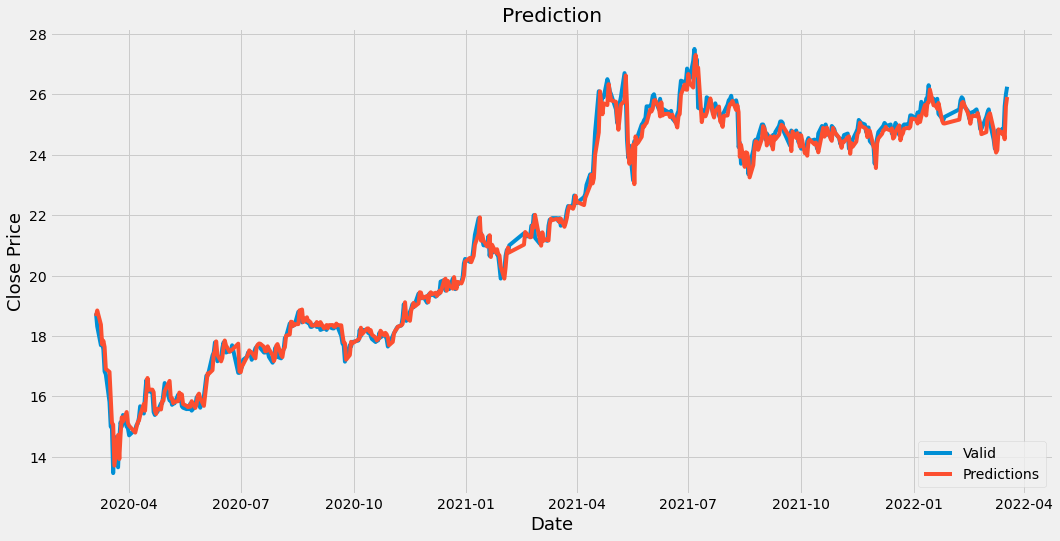

In [ ]:
#plot the data

valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize
plt.figure(figsize=(16,8))
plt.title('Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Valid', 'Predictions'], loc='lower right')
plt.show()